<a href="https://colab.research.google.com/github/Ajay-Ravikumarrajan/Machine_Learning/blob/main/DTC/DTC_Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

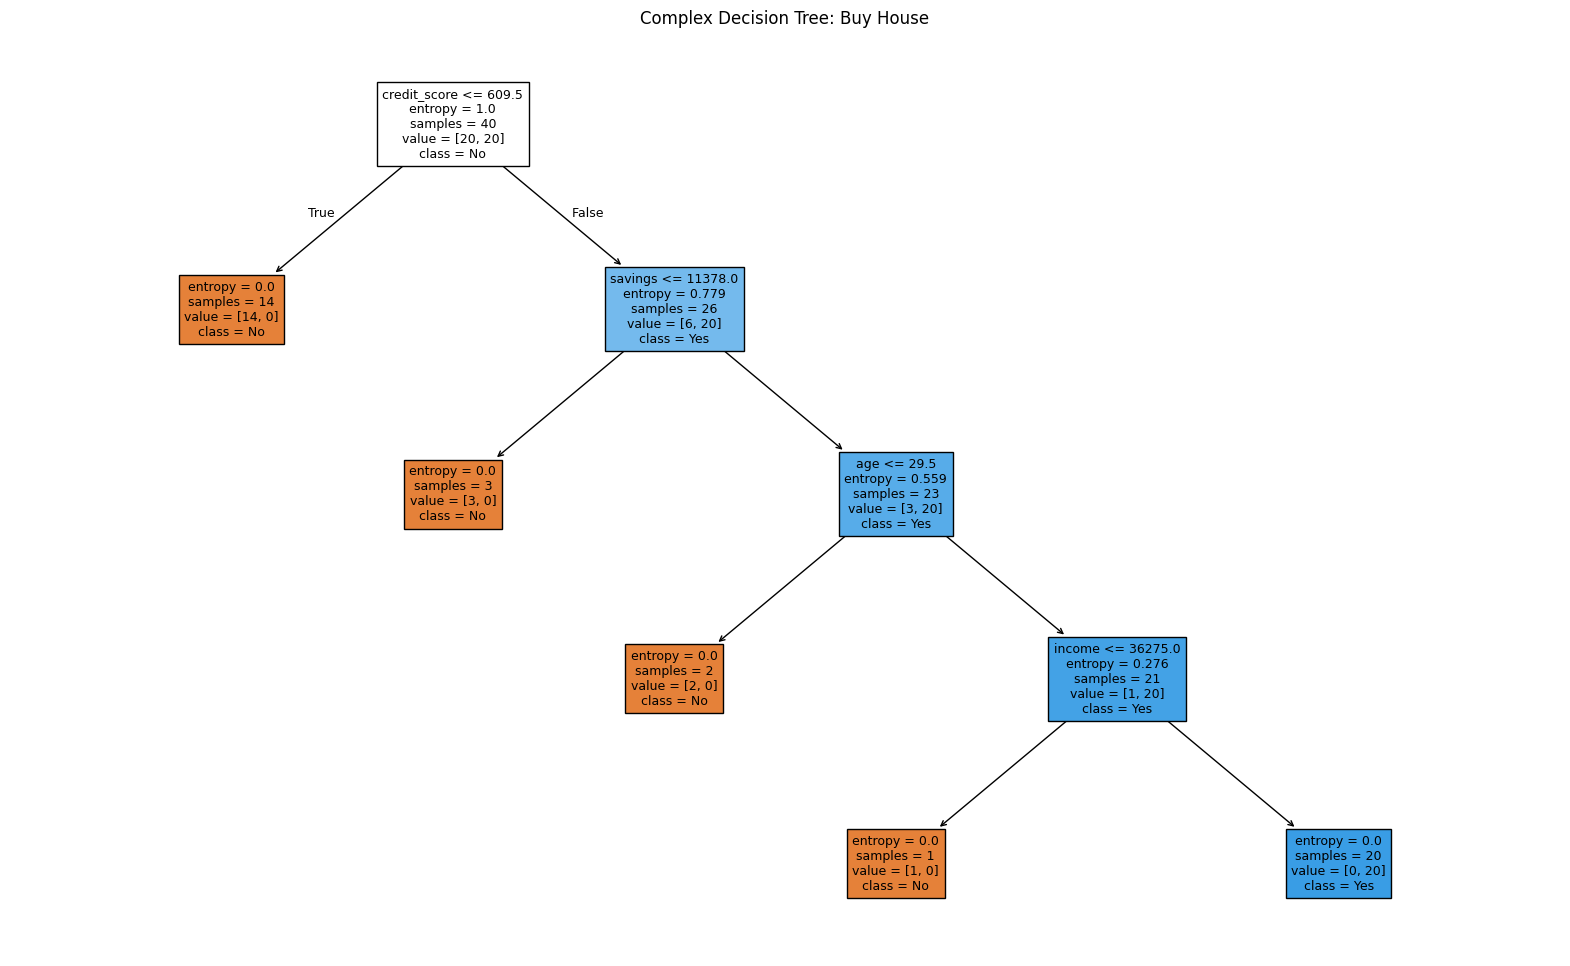

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

np.random.seed(42)

n = 40
data_q1 = {
    "age": np.random.randint(25, 65, n),
    "income": np.random.randint(30000, 150000, n),
    "savings": np.random.randint(1000, 100000, n),
    "credit_score": np.random.randint(400, 900, n),
    "job_type": np.random.choice(["freelancer", "part_time", "full_time", "entrepreneur"], n),
}


data_q1["buy_house"] = [
    1 if (a > 30 and inc > 40000 and sav > 10000 and cs > 600) or jt in ["permanent", "self_employed"]
    else 0
    for a, inc, sav, cs, jt in zip(data_q1["age"], data_q1["income"], data_q1["savings"], data_q1["credit_score"], data_q1["job_type"])
]

df_q1 = pd.DataFrame(data_q1)

df_q1["job_type_encoded"] = df_q1["job_type"].map({
    "intern":0, "contract":1, "permanent":2, "self_employed":3
})

X_q1 = df_q1[["age", "income", "savings", "credit_score", "job_type_encoded"]]
y_q1 = df_q1["buy_house"]

clf_q1 = DecisionTreeClassifier(criterion="entropy", max_depth=6, random_state=42)
clf_q1.fit(X_q1, y_q1)

plt.figure(figsize=(20,12))
plot_tree(clf_q1, feature_names=["age", "income", "savings", "credit_score", "job_type"],
          class_names=["No", "Yes"], filled=True, fontsize=9)
plt.title("Complex Decision Tree: Buy House")
plt.show()